<a href="https://colab.research.google.com/github/paulo-santos-ds/Machine-Learning/blob/main/Holt_Winters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importando Biliotecas

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
np.random.seed(21)
valores = np.random.randint(0,1001,50)

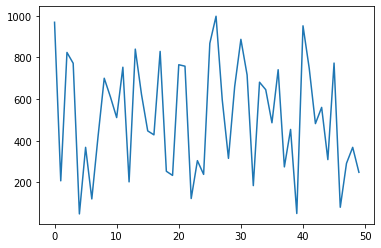

In [17]:
plt.plot(range(len(valores)), valores)
plt.show()

In [18]:
valores = np.sort(valores)

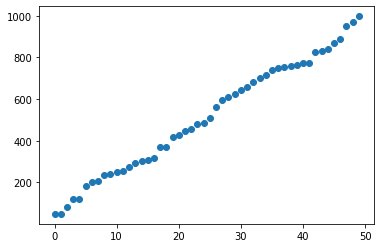

In [19]:
plt.scatter(range(len(valores)), valores)
plt.show()

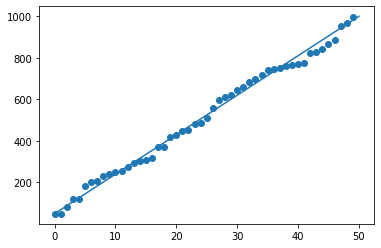

In [20]:
plt.scatter(range(len(valores)), valores)
plt.plot([0,50], [49,1000])
plt.show()

##Equação da reta

In [21]:
## (x,y) e (a,b)
#m = (y-b)/(x-a)

In [22]:
m = (1000-49)/(50-0)
m

19.02

In [23]:
#19.02 = (y - 49)/(51-0)

In [24]:
y = (1002*19.02)+49
y

19107.04

# Holt-Winters

In [25]:
np.random.seed(28)

df = pd.DataFrame()
df['mes'] = list(range(202001, 202013))+list(range(202101, 202113))+list(range(202201, 202206))
df['vendas'] = np.random.randint(2000000, 5000000, 29)

df

,mes,vendas
0,202001,4139393
1,202002,4975237
2,202003,2793632
3,202004,2564483
4,202005,4506839
5,202006,2249996
6,202007,3308864
7,202008,3077171
8,202009,2327148
9,202010,2335624


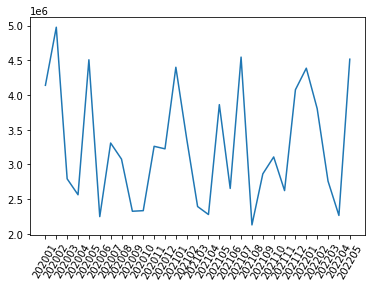

In [26]:
plt.plot(df.index, df['vendas'])
plt.xticks(ticks = df.index, labels=df['mes'], rotation = 60)
plt.show()

In [27]:
# time series - statsmodels 
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [28]:
df['mes'] = pd.to_datetime(df['mes'],format= '%Y%m' )

In [29]:
df.index = df['mes']

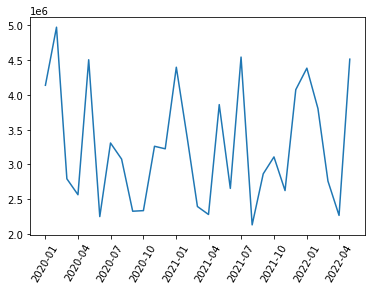

In [30]:
plt.plot(df.index, df['vendas'])
plt.xticks(rotation = 60)
plt.show()

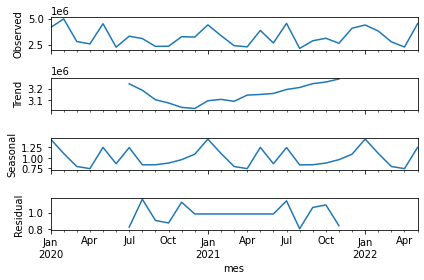

In [31]:
decompose_result = seasonal_decompose(df['vendas'],model='multiplicative')
decompose_result.plot()
plt.show()

In [32]:
df.index.freq = 'MS' ## set dataset index frequency to monthly
# Set the value of Alpha and define m (Time Period)
m = 12
alpha = 1/(2*m)

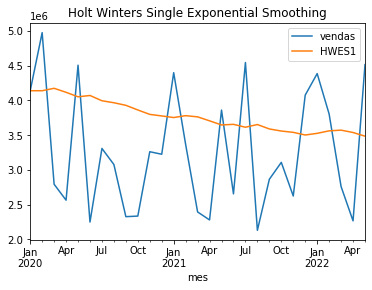

In [33]:
df['HWES1'] = SimpleExpSmoothing(df['vendas']).fit(smoothing_level=alpha,
                                                   optimized=False,use_brute=True).fittedvalues
df[['vendas','HWES1']].plot(title='Holt Winters Single Exponential Smoothing')

plt.show()

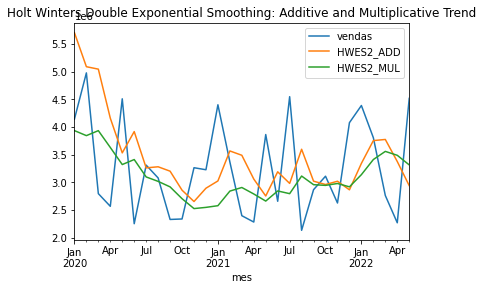

In [34]:
df['HWES2_ADD'] = ExponentialSmoothing(df['vendas'],trend='add').fit().fittedvalues
df['HWES2_MUL'] = ExponentialSmoothing(df['vendas'],trend='mul').fit().fittedvalues
df[['vendas','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend')
plt.show()

In [35]:
treino = df[:24]
teste = df[24:]

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

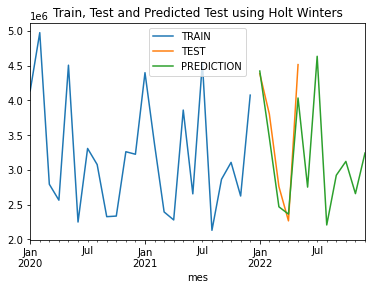

In [36]:
fitted_model = ExponentialSmoothing(treino['vendas'],trend='mul',seasonal='mul',
                                    seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(12)
treino['vendas'].plot(legend=True,label='TRAIN')
teste['vendas'].plot(legend=True,label='TEST',figsize=(6,4))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')

In [37]:
df.columns

Index(['mes', 'vendas', 'HWES1', 'HWES2_ADD', 'HWES2_MUL'], dtype='object')